In [1]:
import seaborn as sns

%matplotlib inline

sns.set_context('notebook')

%config InlineBackend.figure_format = 'retina'

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def print_welcome_message():
    print("Welcome to The DataFrame Statistician!")

In [3]:
def validate_main_option_choice():
    
    #validates the users main option choice as a number from 1 - 4 
   
    # display list of choices
    print("Please choose from the following options:")
    print("    1 – Load data from a file")
    print("    2 – Analyse")
    print("    3 – Visualise")
    print("    4 – Quit")
   
    # Prompts the user for input
    while True:
        try:  # checks the input is a number
            user_choice = int(input("Please enter a number between 1 and 4: "))
        except ValueError:
            print("Try again! Make sure you enter a number.")
            continue
        if user_choice not in range(1, 5):  # checks the number is within the valid range
            print("Try again! Make sure the number you enter is between 1 and 4")
            continue
        else:
            return(user_choice)


In [4]:
def load_csv():
    
    from pandas import read_csv
    
    filepath = input("Please enter the file path?: ")
    
    # decide header row for the dataframe
    try:
        header = int(input("which row is the header (enter a number. 1 for the first row)? Insert 'N' if there is no row of headers: "))
        header -= 1 # correct index for implementation of header
    except ValueError:
        print("No valid row has been entered. No header will be applied")
        header = -1 # set index for no header
                
    # load data
    if header >= 0:
        try:
            myDataFrame = pd.read_csv(filepath, header = header, sep = ",")
            print("File loaded!")
            return(myDataFrame)
        except FileNotFoundError:
            print("Please enter a valid file path. Don't forget the extension")
            print("returning to main menu")
    else:
        try:
            myDataFrame = read_csv(filepath, header = None, sep = ",")
            print("File loaded!")
            return(myDataFrame)
        except FileNotFoundError:
            print("Please enter a valid file path. Don't forget the extension")
            print("returning to main menu")

In [5]:
def create_stats_report(data):
  
    
    # get only numeric data
    datanumeric = data._get_numeric_data()
    
    i = 1 # set index
    
    # list column names with ordered index fr user
    for col in datanumeric.columns:
        print(i, ':', col)
        print("--------------")
        i += 1
    
  # Prompt user for the column they wish to analyse
    while True:
        try:
            col_choice = (int(input("Please select a column of data to analayse: ")))
        except ValueError:
            print("Please enter a valid number.")
            continue
        if col_choice < 0  or col_choice > len(datanumeric.columns) + 1:
            print("Please enter a number corresponding to a column of data to analyse.")
            continue
        else:
            print("OK. Got it!")
            break
         
    col_name = datanumeric.columns[col_choice-1]
    
    data_col = data[col_name]
    
    # Calculate variables
    count = len(data_col)
    average = round(data_col.mean(), 2)
    standdev = round(data_col.std(), 2)

    from scipy import stats

    stderrMean = round(stats.sem(data_col))


    # Print report
    print("----------")
    print("Statistics for", col_name)
    print("")
    print("Number of values (n): ", count)
    print("")
    print("Mean: ", average)
    print("")
    print("Standard Deviation: ", standdev)
    print("")
    print("Standard Error of the Mean: ", stderrMean)
    print("")
    print("--------------------")
    

In [19]:
def subplot_data(datanumeric, graph):
  
    title = input("What would you like the main title to be called? ")
    xaxis = input("What would you like the x-axis to be called? ")
    
    # choose plot
    if graph == 1:
        datanumeric.plot.line(subplots = True, title = title, grid=False, legend = False)
        
    if graph == 2:
        datanumeric.plot.bar(subplots = True, title = title, grid=False, legend = False)
        
    if graph == 3:
        datanumeric.plot.box(subplots = True, title = title, grid=False, legend = False)
        
    plt.xlabel(xaxis)    
    plt.subplots_adjust(hspace = 1, wspace = 1)
    plt.show() 
    

In [20]:
def plot_all(datanumeric, graph):
    
    title = input("What would you like the graph to be called? ")
    xaxis = input("What would you like the x-axis to be called? ")
    yaxis = input("What would you like the y-axis to be called? ")
    
    # choose plot
    print("Got it! Doing it for you now")
    
    if graph == 1:
        datanumeric.plot.line()
    elif graph == 2:
        datanumeric.plot.bar()
    elif graph == 3:
        datanumeric.boxplot()
        
    # name/customise plot
    plt.title(title)
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    
    plt.show() 

In [21]:
def plot_data(data):

    print("1: Line Graph")
    print("2: Bar Graph")
    print("3: Boxplot Graph")
    
    # Prompt user for the graph type they would like
    while True:
        try:
            graph_choice = int(input("Which type of graph would you like to create? Enter the corresponding number!"))
        except ValueError:
            print("please enter a number")
            continue
        if graph_choice < 1 or graph_choice > 3:
            print("Please enter a number corresponding to a column of data to analyse.")
            continue
        else:
            print("OK. Got it!")
            break
            
    print("1: All columns on one plot")
    print("2: All columns on different plots")
    
    # ask for subplot choice
    while True:
        try:
            plot_choice = int(input("Would you like all columns on one plot or subplots? Enter the corresponding number"))
        except ValueError:
            print("please enter a number")
            continue
        if plot_choice < 1 or plot_choice > 2:
            print("Please enter either '1' for one plot or '2' for subplots")
            continue
        else:
            print("OK. Got it!")
            break
    
    # get only numeric data
    datanumeric = data._get_numeric_data()
    
    # call the chosen plot function
    if plot_choice == 1:
        plot_all(datanumeric, graph_choice)
    elif plot_choice == 2:
        subplot_data(datanumeric, graph_choice)
    


In [22]:
def main():
# Displays the welcome menu and option list and calls funciton to carry out chosen task.

    print_welcome_message()

  # gets main option choice from user
    user_choice = validate_main_option_choice()
  
  #initialise emptry dataframe
    data = pd.DataFrame()
    
    
  # loop through main menu options.
    while user_choice != 4:
        if user_choice == 1:
            data_loaded = load_csv()
            data = data_loaded
            user_choice = validate_main_option_choice()
        elif len(data.columns) > 0:
            if user_choice == 2:  
                create_stats_report(data)
                user_choice = validate_main_option_choice()
            elif user_choice == 3:
                plot_data(data)
                user_choice = validate_main_option_choice()
        else: 
            print()
            print("Please load the data before choosing options 2 or 3")
            print()
            user_choice = validate_main_option_choice()
            
        
    print("You have quite the program")
          

Welcome to The DataFrame Statistician!
Please choose from the following options:
    1 – Load data from a file
    2 – Analyse
    3 – Visualise
    4 – Quit
Please enter a number between 1 and 4: 1
Please enter the file path?: testdata.csv
which row is the header (enter a number. 1 for the first row)? Insert 'N' if there is no row of headers: 3
File loaded!
Please choose from the following options:
    1 – Load data from a file
    2 – Analyse
    3 – Visualise
    4 – Quit
Please enter a number between 1 and 4: 3
1: Line Graph
2: Bar Graph
3: Boxplot Graph
Which type of graph would you like to create? Enter the corresponding number!2
OK. Got it!
1: All columns on one plot
2: All columns on different plots
Would you like all columns on one plot or subplots? Enter the corresponding number2
OK. Got it!
What would you like the main title to be called? jay
What would you like the x-axis to be called? s


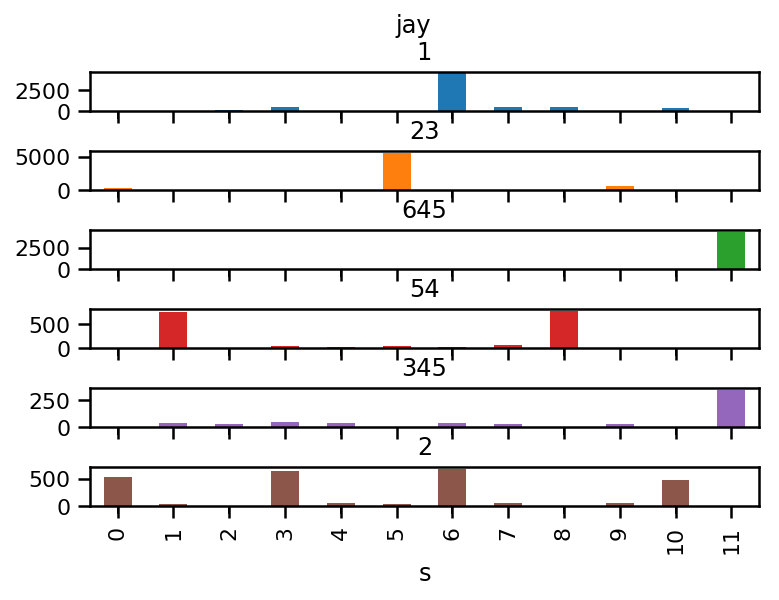

Please choose from the following options:
    1 – Load data from a file
    2 – Analyse
    3 – Visualise
    4 – Quit


In [ ]:
main()